In [23]:
from urllib.request import urlopen
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def load_code_from_url(url_path):
  code_str = urlopen(url_path).read()
  code_str = code_str.decode('utf-8')
  exec(code_str)
  return code_str

directory= "https://raw.githubusercontent.com/hoat23/VisionArtificialAndImageProcessing/master"
code_str = directory + "/bin/utils_imgprocessing.py"
code = load_code_from_url(code_str)
exec(code)

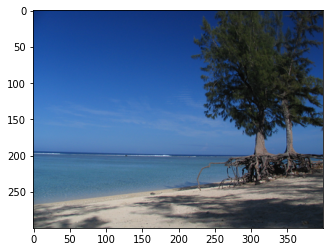

In [24]:
url_img = directory + "/img/img_03.png"
img = load_image_from_url(url_img)
plot_img(img)
cornerMask = np.zeros(img.shape[:2], dtype = "uint8")

In [26]:
# BASIC IMAGE DESCRIPTORS
# extract mean and stdev from each channel
(means, stds) = cv2.meanStdDev(img)
print("channels    :", img.ndim)
print("size        :", img.shape[:2])
print("means       :", means.flatten())
print("stds        :", stds.flatten())

channels    : 3
size        : (300, 400)
means       : [127.42226667  91.27759167  63.94341667]
stds        : [56.84169266 42.11601003 43.98246562]


Text(0.5, 1.0, 'Histogram L*a*b')

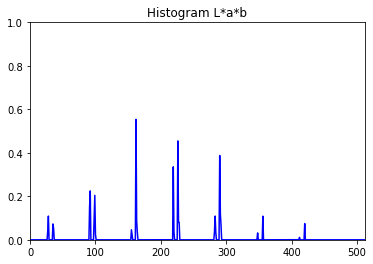

In [47]:
# Convert image to L*a*b, compute histogram and normalize
img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
mask = None
bins = [8,8,8]
hist = cv2.calcHist([img_lab], [0,1,2], mask, bins, [0,256,0,256,0,256])
hist = cv2.normalize(hist, hist).flatten()
plt.plot(hist,color = ('b'))
plt.xlim([0,512])
plt.ylim([0,1])
plt.title("Histogram L*a*b")

In [ ]:
from scipy.spatial import distance as dist
#index[filename] = features
features = np.concatenate([means, stds]).flatten()
d = dist.euclidean(index["trex_01.png"], index[k])